In [1]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

!wget https://www.cs.cmu.edu/~deva/pics/apple.jpg -qq
!wget https://www.cs.cmu.edu/~deva/pics/orange.jpg -qq
!wget https://www.cs.cmu.edu/~deva/pics/mask.jpg -qq

In [35]:
def reduce(image):
# Reduce size of image by 2X by blurring and subsampling
  k = np.array([1,4,6,4,1])/16
  kernal = np.outer(k,k)
  res = np.zeros((image.shape[0]//2,image.shape[1]//2,image.shape[2]))
  for i in range(image.shape[2]):
    res[:,:,i] = signal.convolve2d(image[:,:,i], kernal, mode='same')[::2,::2]
  return res

def expand(image):
# Expand image size by 2X by zero-interlacing and weighted-averaging
  k = np.array([1,4,6,4,1])/16
  kernal = np.outer(k,k)
  res = np.zeros((2*image.shape[0],2*image.shape[1],image.shape[2]))
  res[::2,::2,:] = image
  for i in range(image.shape[2]):
    res[:,:,i] = signal.convolve2d(res[:,:,i],4*kernal, mode='same')
  return res

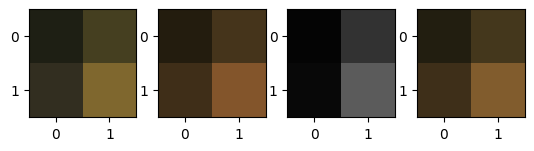

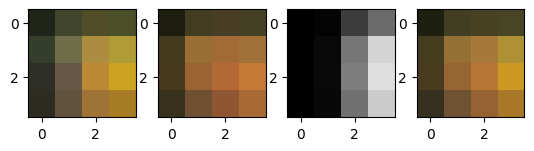

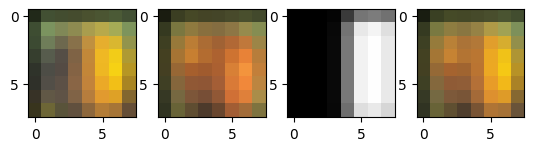

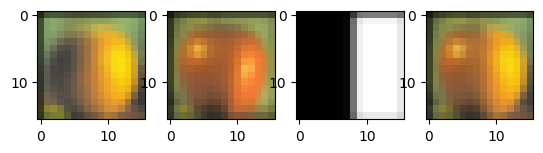

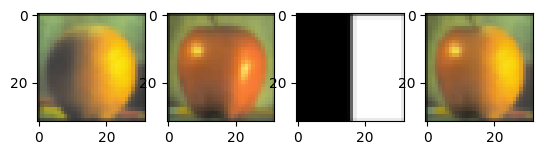

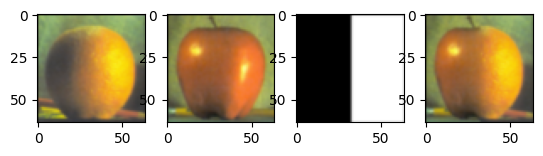

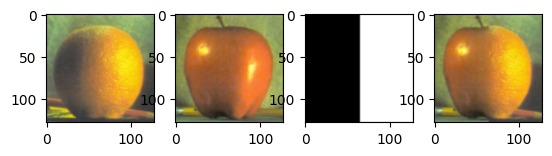

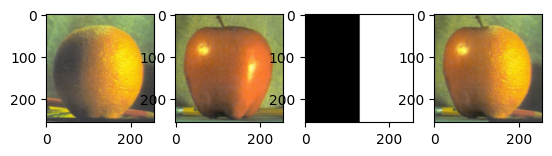

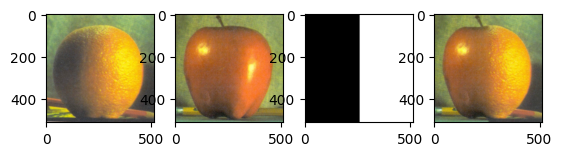

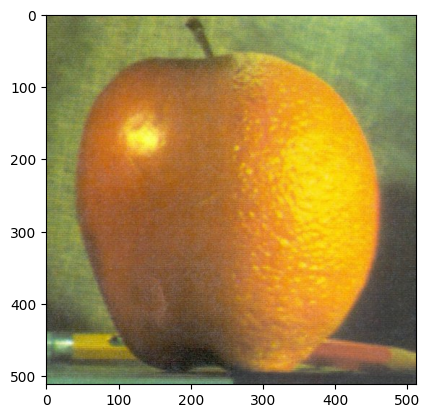

In [223]:
im1,im2,mask = plt.imread('orange.jpg'), plt.imread('apple.jpg'),plt.imread('mask.jpg')/255.0

# Step 1: construct Gaussian pyramid of mask,im1,im2
im1s, im2s, masks = [im1], [im2], [mask]
while masks[-1].shape[0] >= 2 and masks[-1].shape[1] >= 2:
  im1s.append(reduce(im1s[-1]))
  im2s.append(reduce(im2s[-1]))
  masks.append(reduce(masks[-1]))

# Step 2: convert im1 and im2 to laplacian pyramids lap1 and lap2, blend and build back up
blend = im1s[-1] * (1.0 - masks[-1]) + im2s[-1] * masks[-1]
for i in reversed(range(len(masks)-1)):
  lap1 = im1s[i] - expand(im1s[i+1])
  lap2 = im2s[i] - expand(im2s[i+1])
  blend = expand(blend) + lap2 * (1.0 - masks[i]) + lap1 * masks[i]
  plt.subplot(141); plt.imshow(im1s[i].astype(int));
  plt.subplot(142); plt.imshow(im2s[i].astype(int));
#  plt.subplot(141); plt.imshow(lap1.mean(2),cmap='gray');
  plt.subplot(143); plt.imshow(masks[i]);
  plt.subplot(144); plt.imshow(blend.astype(int));
  plt.show()

plt.imshow(blend.astype(int))